In [1]:
!pip install pyarrow
!pip install fastparquet


You should consider upgrading via the 'C:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\Scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd

# Cargar el archivo Parquet
df_parquet = pd.read_parquet('ibex_historical_data')
df_parquet.to_csv('ibex_historical_data.csv', index = True)
df = pd.read_csv('ibex_historical_data.csv')
# Establecer la columna 'data' como índice
df.set_index('date', inplace=True)
df.head()

c:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


,A3TV,ABE,ABG.P,ABG.P_1,ABG,ACE,ACR,ACS,ACX,ACX_1,...,URB,VAL,VAL_1,VDR,VIS,VIS_1,VIS_2,VIS_3,ZEL,ZOT
date,,,,,,,,,,,,,,,,,,,,,
1993-08-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1586,...,NaN,NaN,NaN,NaN,2.8762,NaN,NaN,NaN,NaN,0.4122
1993-08-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1539,...,NaN,NaN,NaN,NaN,2.8093,NaN,NaN,NaN,NaN,0.4097
1993-08-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.1539,...,NaN,NaN,NaN,NaN,2.8928,NaN,NaN,NaN,NaN,0.4109
1993-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0929,...,NaN,NaN,NaN,NaN,2.8846,NaN,NaN,NaN,NaN,0.4108
1993-08-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0929,...,NaN,NaN,NaN,NaN,2.8678,NaN,NaN,NaN,NaN,0.4129


Consistencia : los activos estan repartidos por grupos para indicar momento en los que formaron parte del indice. 

Necesitamos saber si en algun momento esos grupos tiene precios solapados. 
Es decir, buscamos que para cada grupo , para cada fila, solo uno tenga precio

In [3]:
# Extract the first three letters of each column name to identify unique assets
unique_asset_prefixes = set([col[:3] for col in df.columns])

# Convert the set to a list for display
unique_assets_list = sorted(list(unique_asset_prefixes))

unique_assets_list

['A3T',
 'ABE',
 'ABG',
 'ACE',
 'ACR',
 'ACS',
 'ACX',
 'AEN',
 'AGR',
 'AGS',
 'ALB',
 'ALM',
 'ALT',
 'AMP',
 'AMS',
 'ANA',
 'ANE',
 'ARA',
 'ARG',
 'ASL',
 'AUM',
 'AZC',
 'BBV',
 'BCH',
 'BKI',
 'BKT',
 'BME',
 'BTO',
 'CAB',
 'CAN',
 'CAR',
 'CEN',
 'CEP',
 'CIE',
 'CIN',
 'CLN',
 'COL',
 'CRF',
 'CRI',
 'CTE',
 'CTF',
 'CTG',
 'CUB',
 'DIA',
 'DRC',
 'EBA',
 'EBR',
 'ECR',
 'ELE',
 'ENC',
 'ENG',
 'EVA',
 'EXT',
 'FAD',
 'FCC',
 'FDR',
 'FEC',
 'FER',
 'FOC',
 'GAM',
 'GAS',
 'GES',
 'GPP',
 'GRF',
 'HHU',
 'HID',
 'HIS',
 'IAG',
 'IBE',
 'IBL',
 'IBR',
 'IDR',
 'ITX',
 'JAZ',
 'LOG',
 'LOR',
 'MAP',
 'MAS',
 'MEL',
 'MRL',
 'MTS',
 'MVC',
 'NHH',
 'NTG',
 'OHL',
 'PHM',
 'PMD',
 'POP',
 'PRS',
 'PRY',
 'PUL',
 'RAD',
 'RED',
 'REE',
 'REP',
 'ROV',
 'SAB',
 'SAN',
 'SAR',
 'SCH',
 'SCY',
 'SEV',
 'SGC',
 'SGR',
 'SLR',
 'SOL',
 'SYV',
 'TAB',
 'TEF',
 'TEM',
 'TL5',
 'TPI',
 'TPZ',
 'TRE',
 'TRR',
 'TUB',
 'UNF',
 'UNI',
 'URA',
 'URB',
 'VAL',
 'VDR',
 'VIS',
 'ZEL',
 'ZOT']

In [4]:
# Group columns by their unique asset prefix
grouped_assets = {prefix: [col for col in df.columns if col.startswith(prefix)] for prefix in unique_asset_prefixes}
grouped_assets

{'IAG': ['IAG'],
 'JAZ': ['JAZ'],
 'IBR': ['IBR'],
 'TPZ': ['TPZ'],
 'CUB': ['CUB'],
 'IBE': ['IBE'],
 'BKT': ['BKT'],
 'AUM': ['AUM'],
 'EBR': ['EBRO', 'EBRO_1'],
 'PHM': ['PHM'],
 'AEN': ['AENA'],
 'BTO': ['BTO', 'BTO_1'],
 'TRE': ['TRE'],
 'TEF': ['TEF'],
 'SCH': ['SCH'],
 'EXT': ['EXT'],
 'NHH': ['NHH', 'NHH_1', 'NHH_2'],
 'ALB': ['ALB', 'ALB_1', 'ALB_2', 'ALB_3'],
 'ROV': ['ROVI'],
 'HHU': ['HHU', 'HHU_1'],
 'RAD': ['RAD'],
 'GPP': ['GPP'],
 'OHL': ['OHLA'],
 'CEP': ['CEP', 'CEP_1'],
 'AMP': ['AMP'],
 'LOR': ['LOR'],
 'POP': ['POP'],
 'ALM': ['ALM'],
 'ECR': ['ECR'],
 'EBA': ['EBA'],
 'GAS': ['GAS'],
 'HIS': ['HIS'],
 'MVC': ['MVC', 'MVC_1'],
 'REE': ['REE', 'REE_1'],
 'A3T': ['A3TV'],
 'URB': ['URB'],
 'AMS': ['AMS', 'AMS_1'],
 'SEV': ['SEV'],
 'VAL': ['VAL', 'VAL_1'],
 'SCY': ['SCYR', 'SCYR_1'],
 'GAM': ['GAM', 'GAM_1'],
 'EVA': ['EVA'],
 'TRR': ['TRR', 'TRR_1'],
 'CAB': ['CABK'],
 'RED': ['RED'],
 'FDR': ['FDR'],
 'ACS': ['ACS'],
 'TAB': ['TAB'],
 'UNI': ['UNI'],
 'GRF': ['GRF'

In [5]:
# Store groups and rows where the condition is not met
inconsistent_groups_data = {}

for prefix, columns in grouped_assets.items():
    # Filter columns where all values are NaN
    non_empty_columns = [col for col in columns if not df[col].isna().all()]
    
    # If there's only one non-empty column, then skip
    if len(non_empty_columns) <= 1:
        continue
    
    subset_df = df[non_empty_columns]
    
    # Find rows where more than one column has a value
    multi_value_rows = subset_df[subset_df.notna().sum(axis=1) > 1]
    
    if not multi_value_rows.empty:
        inconsistent_groups_data[prefix] = multi_value_rows

inconsistent_groups_data


{}

Creamos un nuevo df con una columna para cada activo

In [6]:
# Create a new DataFrame with one column per group while maintaining original prices
consolidated_df_v2 = pd.DataFrame(index=df.index)

for prefix, columns in grouped_assets.items():
    # Combine values across the columns for each row to create the new column
    # By using forward fill followed by backward fill, we ensure that any NaN gaps are filled with available values
    combined_series = df[columns].ffill(axis=1).bfill(axis=1).iloc[:, 0]
    consolidated_df_v2[prefix] = combined_series

consolidated_df_v2.head()



C:\Users\Julian\AppData\Local\Temp\ipykernel_5080\1107090515.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  consolidated_df_v2[prefix] = combined_series
C:\Users\Julian\AppData\Local\Temp\ipykernel_5080\1107090515.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  consolidated_df_v2[prefix] = combined_series
C:\Users\Julian\AppData\Local\Temp\ipykernel_5080\1107090515.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Cons

,IAG,JAZ,IBR,TPZ,CUB,IBE,BKT,AUM,EBR,PHM,...,FCC,ENG,CTF,AGS,ABG,URA,SLR,CTG,ACR,FEC
date,,,,,,,,,,,,,,,,,,,,,
1993-08-04,NaN,NaN,NaN,NaN,NaN,0.4023,0.1402,NaN,NaN,NaN,...,3.7985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-05,NaN,NaN,NaN,NaN,NaN,0.3985,0.1392,NaN,NaN,NaN,...,3.7604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-06,NaN,NaN,NaN,NaN,NaN,0.3957,0.1388,NaN,NaN,NaN,...,3.7702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-09,NaN,NaN,NaN,NaN,NaN,0.3954,0.1377,NaN,NaN,NaN,...,3.7667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-10,NaN,NaN,NaN,NaN,NaN,0.4000,0.1388,NaN,NaN,NaN,...,3.8142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
consolidated_df_v2.to_csv('ibex_historical_data_consolidated.csv', index = True)

c:\Users\Julian\Documents\RepositoriosPersonales\GPU_venv\lib\site-packages\pandas\core\internals\blocks.py:2323: RuntimeWarning: invalid value encountered in cast
  values = values.astype(str)


In [2]:
import pandas as pd

In [3]:
df_con = pd.read_csv('ibex_historical_data_consolidated.csv')
# Establecer la columna 'data' como índice
df_con.set_index('date', inplace=True)
df_con.head()

,IAG,JAZ,IBR,TPZ,CUB,IBE,BKT,AUM,EBR,PHM,...,FCC,ENG,CTF,AGS,ABG,URA,SLR,CTG,ACR,FEC
date,,,,,,,,,,,,,,,,,,,,,
1993-08-04,NaN,NaN,NaN,NaN,NaN,0.4023,0.1402,NaN,NaN,NaN,...,3.7985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-05,NaN,NaN,NaN,NaN,NaN,0.3985,0.1392,NaN,NaN,NaN,...,3.7604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-06,NaN,NaN,NaN,NaN,NaN,0.3957,0.1388,NaN,NaN,NaN,...,3.7702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-09,NaN,NaN,NaN,NaN,NaN,0.3954,0.1377,NaN,NaN,NaN,...,3.7667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-08-10,NaN,NaN,NaN,NaN,NaN,0.4000,0.1388,NaN,NaN,NaN,...,3.8142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


comprobamos un activo para ver si los datos coinciden

In [4]:
df_con.SAN

date
1993-08-04    0.7395
1993-08-05    0.7418
1993-08-06    0.7404
1993-08-09    0.7404
1993-08-10    0.7438
               ...  
2023-07-10       NaN
2023-07-11       NaN
2023-07-12       NaN
2023-07-13       NaN
2023-07-14       NaN
Name: SAN, Length: 7589, dtype: float64

In [5]:
df.SAN

NameError: name 'df' is not defined

con el nuevo csv, crear un subplot , cada plot para una activo/columna. Donde se pueda verse la evolucion del precio, y añade barras horizontales donde no tengan precio

In [6]:
import matplotlib
#matplotlib.use('nbAgg')  # usa el backend 'nbAgg' para Jupyter
import matplotlib.pyplot as plt


In [22]:
def plot_alternative_nan_periods(asset_data):
    """
    Alternative method to plot only the NaN periods of a single asset.
    
    Parameters:
    - asset_data: A pandas Series containing the historical data of a single asset.
    """
    fig, ax = plt.subplots(figsize=(12, 6))
    
    # Highlight NaN values with red vertical lines
    nan_indices = asset_data[asset_data.isna()].index
    for idx in nan_indices:
        print("AA")
        ax.axvline(x=idx, color='red', alpha=0.4, lw=0.5)
    
    ax.set_title(f"NaN Periods of {asset_data.name}")
    ax.set_xlim(asset_data.index.min(), asset_data.index.max())
    ax.set_yticks([])
    ax.set_ylabel('NaN Periods')
    ax.set_xlabel('Date')
    
    plt.tight_layout()
    plt.show()

# Use the alternative function with the "SAN" asset data
#plot_alternative_nan_periods(df['SAN'])


In [14]:
df_con.SAN.shape

(7589,)

In [15]:
# Check for NaN values in the "SAN" data
nan_count = df_con.SAN.isna().sum()
nan_count

1296

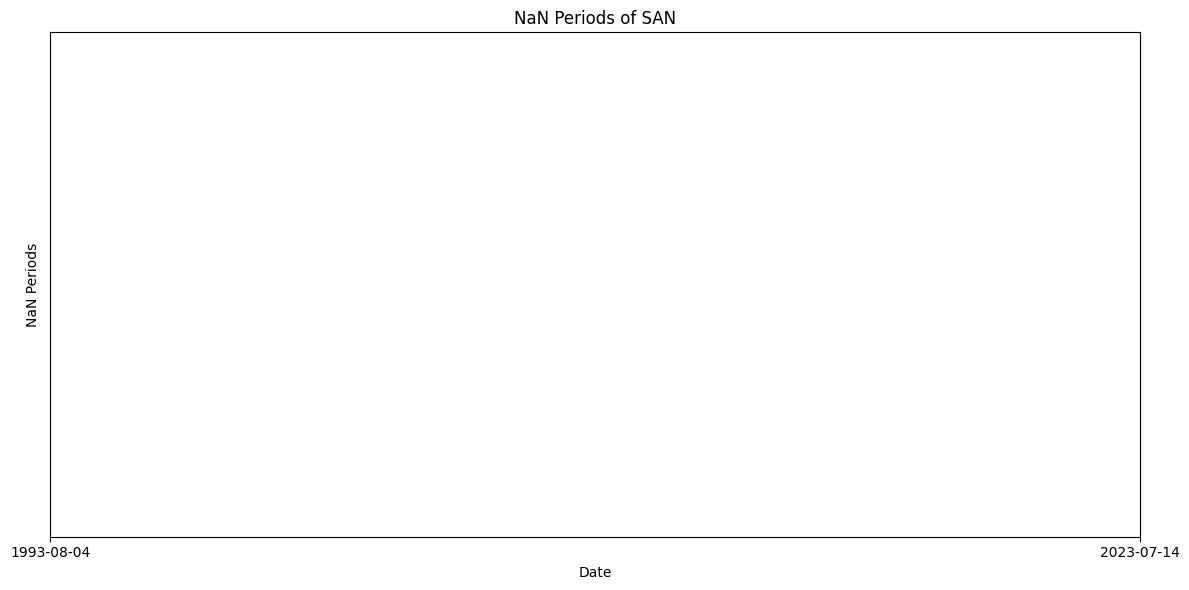

In [24]:
# Return the function for future use
plot_alternative_nan_periods(df_con.SAN)